#####  Set up the environment


In [3]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


^C


  Using cached pandas-2.3.1-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.5-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp312-cp312-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached scipy-1.16.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cache

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'd:\\Coding\\Machine Learning Path\\Machine-Learning\\.venv\\Lib\\site-packages\\pandas\\tests\\test_nanops.py'
Check the permissions.



In [66]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, callbacks

from tensorflow.keras.layers import Normalization , Dense ,InputLayer


#### Loading Stock Dataset

#### The dataset contain the seven columns Date,Open,high,Low,Close,Adj Close,Volume which represent the stock price for a day . It have data of differnt dates 
Date – trading day in YYYY-MM-DD format
Market metrics: Open, High, Low, Close (simulated daily prices) and Volume

In [67]:
data = pd.read_csv("./data_set/AAP.csv")
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-11-29,13.386666,14.466666,13.360000,13.880000,13.165758,371100
1,2001-11-30,13.880000,14.266666,13.880000,14.266666,13.532527,165300
2,2001-12-03,14.233334,14.233334,13.783334,13.783334,13.074061,127500
3,2001-12-04,13.783334,13.783334,13.233334,13.233334,12.552365,95400
4,2001-12-05,13.433333,14.783334,13.433333,14.666667,13.911942,598200


In [68]:
data.shape # displaying the shape of the data

(4616, 7)

In [69]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4616 entries, 0 to 4615
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4616 non-null   object 
 1   Open       4616 non-null   float64
 2   High       4616 non-null   float64
 3   Low        4616 non-null   float64
 4   Close      4616 non-null   float64
 5   Adj Close  4616 non-null   float64
 6   Volume     4616 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 252.6+ KB


#### Datapreprocessing

In [70]:
#  Check for missing values . That  is For each column, how many cells have no data 
print(data.isnull().sum())

#  Drop rows with missing data . Also there are some ways in which we Fill missing values with some statistical formula
data = data.dropna()  # simple approach; you can impute instead

# After droping the missing values
print("")
print("_"*100)
print("")
print(data.isnull().sum())


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

____________________________________________________________________________________________________

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


##### Seaborn pairplot is used to create a pairwise plot between different variables of the dataset to visualize the relationship between them . In the exaple below you can see how different variable value changes with respect to each other

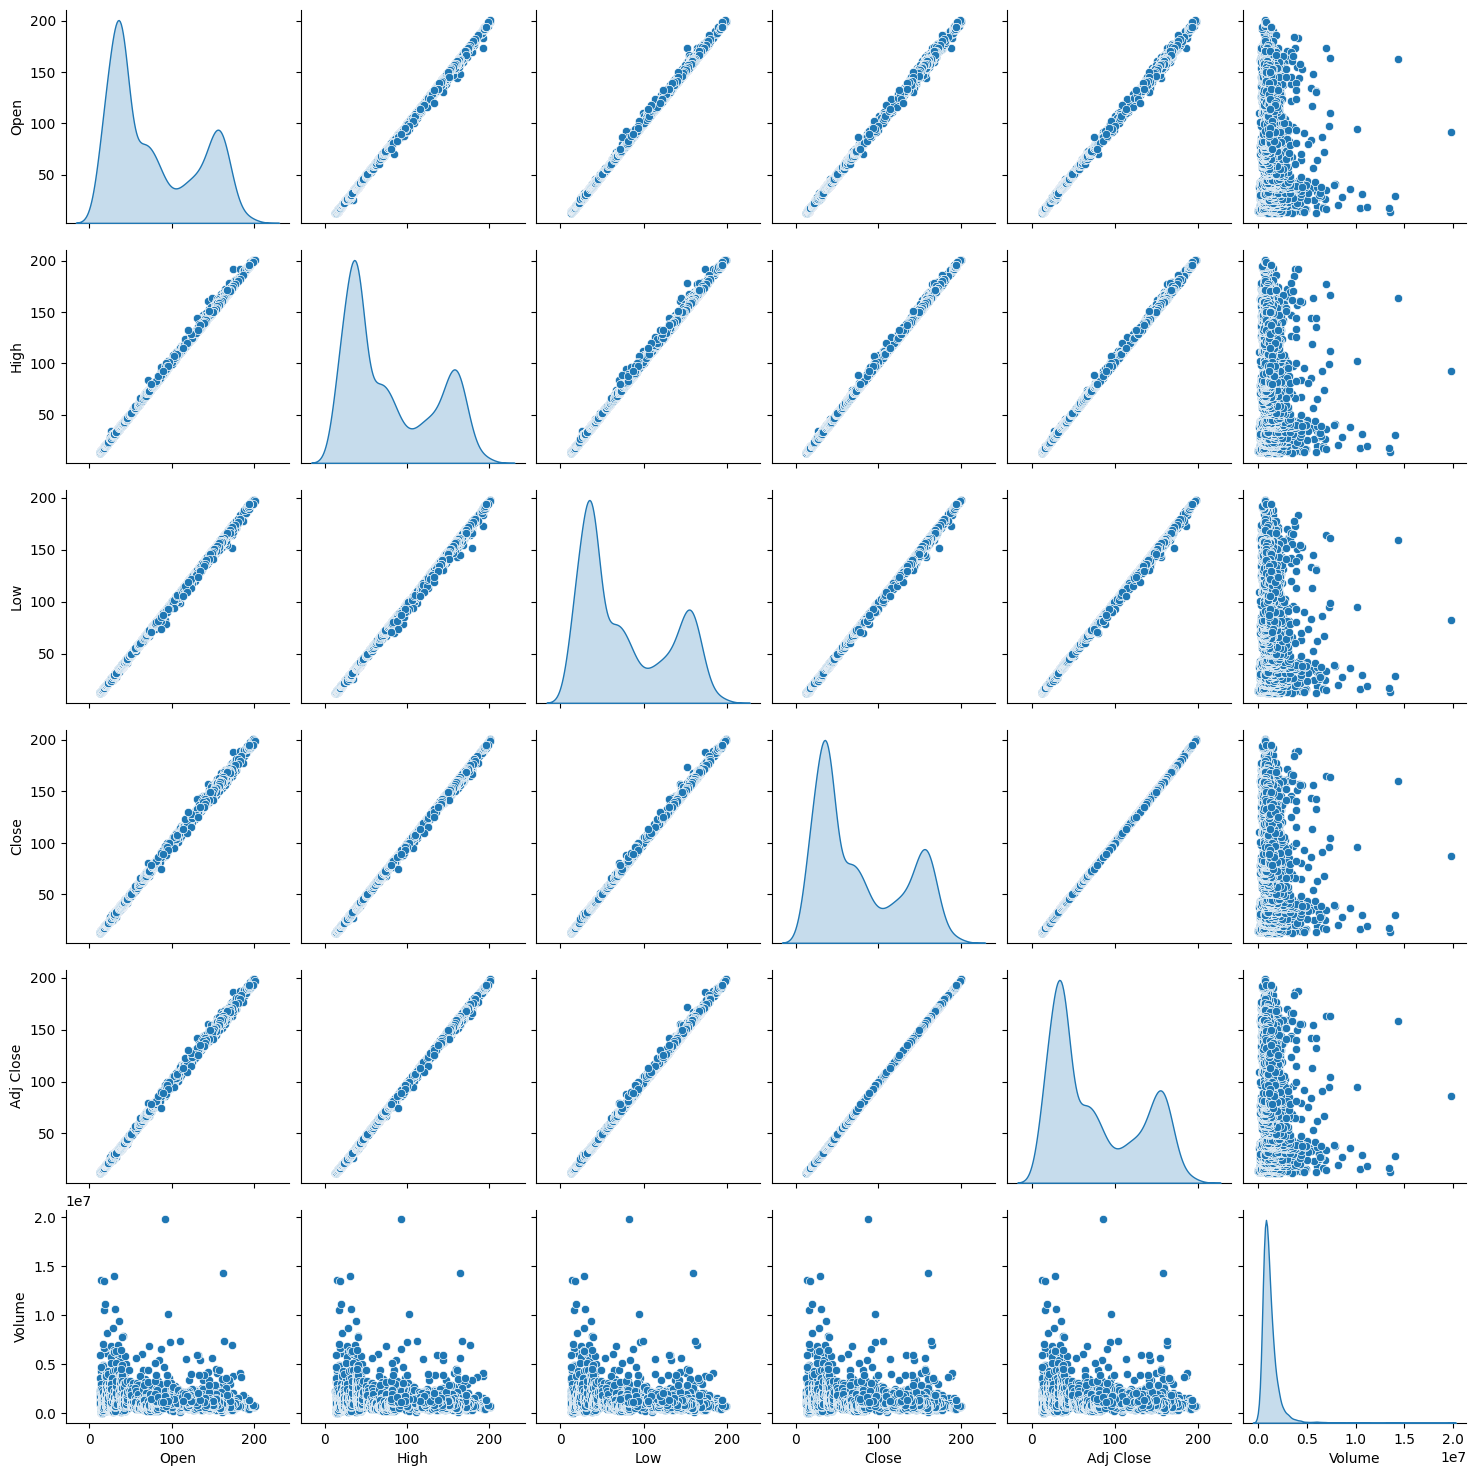

In [71]:
sns.pairplot(
    data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']],
    diag_kind='kde')


##### For stock regression, a common choice is predicting the closing price using other features:

In [72]:
# Converting the dataset into tensors for model training
tensor_data = tf.constant( data.drop(columns=['Date'])) 
tensor_data = tf.random.shuffle(tensor_data) # shuffle the data to ensure randomness
print(tensor_data)
print(tensor_data.shape)  # Display the shape of the tensor data

tf.Tensor(
[[1.94599991e+01 1.97999992e+01 1.92700005e+01 1.96233330e+01
  1.86135445e+01 1.32120000e+06]
 [9.95800018e+01 9.99499969e+01 9.81399994e+01 9.88799973e+01
  9.75507050e+01 2.89000000e+05]
 [4.22400017e+01 4.25600014e+01 4.18400002e+01 4.23100014e+01
  4.01327896e+01 5.61400000e+05]
 ...
 [6.80000000e+01 6.84499969e+01 6.76600037e+01 6.78399963e+01
  6.67247696e+01 7.85400000e+05]
 [1.76050003e+02 1.77320007e+02 1.73960007e+02 1.75580002e+02
  1.74093246e+02 5.21500000e+05]
 [4.37999992e+01 4.39266663e+01 4.34799995e+01 4.35533333e+01
  4.13121262e+01 9.57400000e+05]], shape=(4616, 6), dtype=float64)
(4616, 6)


In [73]:
# Keep: Open(1), High(2), Low(3), Adj Close(5), Volume(6)
X = tf.concat([tensor_data[:, 0:4], tensor_data[:, 5:]], axis=1)
print(X.shape)  # Display the shape of the feature tensor
print(X)    # first five row of the feature tensor

(4616, 5)
tf.Tensor(
[[1.94599991e+01 1.97999992e+01 1.92700005e+01 1.96233330e+01
  1.32120000e+06]
 [9.95800018e+01 9.99499969e+01 9.81399994e+01 9.88799973e+01
  2.89000000e+05]
 [4.22400017e+01 4.25600014e+01 4.18400002e+01 4.23100014e+01
  5.61400000e+05]
 ...
 [6.80000000e+01 6.84499969e+01 6.76600037e+01 6.78399963e+01
  7.85400000e+05]
 [1.76050003e+02 1.77320007e+02 1.73960007e+02 1.75580002e+02
  5.21500000e+05]
 [4.37999992e+01 4.39266663e+01 4.34799995e+01 4.35533333e+01
  9.57400000e+05]], shape=(4616, 5), dtype=float64)


In [74]:
y = tensor_data[:,4:5]
# y = tf.expand_dims(y, axis=1)  # tf.expand_dims adds a new dimension at the specified axis — here, axis=1 (the second axis)
print(y.shape)
print(y)

(4616, 1)
tf.Tensor(
[[ 18.61354446]
 [ 97.55070496]
 [ 40.13278961]
 ...
 [ 66.72476959]
 [174.09324646]
 [ 41.31212616]], shape=(4616, 1), dtype=float64)


#### Splitting of Data into traning and validation to remove the bias and variance in the model traning

In [75]:
TRAIN_RATIO = 0.8 # defining the training ratio
VAL_RATIO = 0.1 # defining the validation ratio
TEST_RATIO = 0.1 # defining the testing ratio
DATASET_SIZE = len(X) # getting the size of the dataset

In [76]:
# Training data
X_train = X[:int(TRAIN_RATIO * DATASET_SIZE)] # training data
y_train = y[:int(TRAIN_RATIO * DATASET_SIZE)] # training target data
print(X_train.shape) 
print(y_train.shape) 

(3692, 5)
(3692, 1)


In [77]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) # creating the training dataset from the training data and target data


In [78]:
# Validation data
X_val = X[int(TRAIN_RATIO*DATASET_SIZE):int((VAL_RATIO+TRAIN_RATIO)*DATASET_SIZE)] # validation data
y_val = y[int(TRAIN_RATIO*DATASET_SIZE):int((VAL_RATIO+TRAIN_RATIO)*DATASET_SIZE)] # validation target data
print(X_val.shape)
print(y_val.shape)

(462, 5)
(462, 1)


In [79]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
     

In [80]:
# Testing data
X_test = X[int((VAL_RATIO+TRAIN_RATIO)*DATASET_SIZE):] # testing data
y_test = y[int((VAL_RATIO+TRAIN_RATIO)*DATASET_SIZE):] # testing target data
print(X_test.shape)
print(y_test.shape)

(462, 5)
(462, 1)


In [81]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) # creating the testing dataset from the testing data and target data


#### Linear Regression


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step - loss: 8741.0967 - root_mean_squared_error: 93.4938 - val_loss: 7650.7192 - val_root_mean_squared_error: 87.4684
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step - loss: 8071.2222 - root_mean_squared_error: 89.8400 - val_loss: 7104.5591 - val_root_mean_squared_error: 84.2885
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - loss: 7477.8647 - root_mean_squared_error: 86.4746 - val_loss: 6618.5869 - val_root_mean_squared_error: 81.3547
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - loss: 6950.2739 - root_mean_squared_error: 83.3683 - val_loss: 6184.3662 - val_root_mean_squared_error: 78.6407
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 6479.3213 - root_mean_squared_error: 80.4942 - val_loss: 5794.7397 - val_root_mean_squared_error: 76.1232
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - loss: 6057.2437 - root_mean_squared_error: 77.8283 - val_loss: 5443.6313 - val_root_mean_squared_error: 73.7810
Epoch 7/10

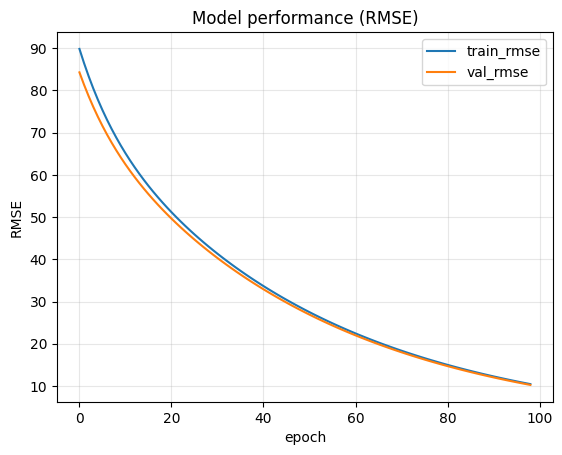

In [82]:
# --- Prepare tensors (no extra dims) ---
# X: (N, d), y: (N, 1)
X_train = tf.cast(X_train, tf.float32)
X_val   = tf.cast(X_val,   tf.float32)
X_test  = tf.cast(X_test,  tf.float32)

y_train = tf.cast(y_train, tf.float32)       # ensure (N,1)
y_val   = tf.cast(y_val,   tf.float32)
y_test  = tf.cast(y_test,  tf.float32)

# If you built y from a single tensor 'tensor_data':
# y = tensor_data[:, 4:5]         # keep (N,1) — DO NOT expand_dims

# --- Model ---
normalizer = tf.keras.layers.Normalization()
normalizer.adapt(X_train)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],), dtype=tf.float32),
    normalizer,
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # tune if divergence occurs
model.compile(
    optimizer=optimizer,
    loss="mse",
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# --- Full-batch training (one gradient step per epoch) ---
full_batch = int(X_train.shape[0])
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=full_batch,     # <-- no mini-batches
    shuffle=True,
    epochs=100,
    verbose=1
)

# --- Plot (skip the very first point for readability) ---
import matplotlib.pyplot as plt
tr = history.history["root_mean_squared_error"][1:]
vl = history.history["val_root_mean_squared_error"][1:]
plt.plot(tr, label="train_rmse")
plt.plot(vl, label="val_rmse")
plt.title("Model performance (RMSE)")
plt.xlabel("epoch")
plt.ylabel("RMSE")
plt.legend(); plt.grid(True, alpha=0.3); plt.show()


In [83]:
# 6) Evaluate + Inspect coefficients
test_mse, test_mae = model_lr.evaluate(X_test, y_test, verbose=1)
w, b = model_lr.layers[-1].get_weights()

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9105.9609 - root_mean_squared_error: 95.4252    


In [84]:
print(f"Test MSE: {test_mse:.6f} | Test MAE: {test_mae:.6f}")
print(f"Weights:{w.flatten()} , Bias:{float(b)}")

Test MSE: 9105.960938 | Test MAE: 95.425156
Weights:[-0.9322579   0.9510319  -0.4848106  -0.9617193   0.38549066] , Bias:0.0


C:\Users\HP\AppData\Local\Temp\ipykernel_19512\1212730367.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Weights:{w.flatten()} , Bias:{float(b)}")


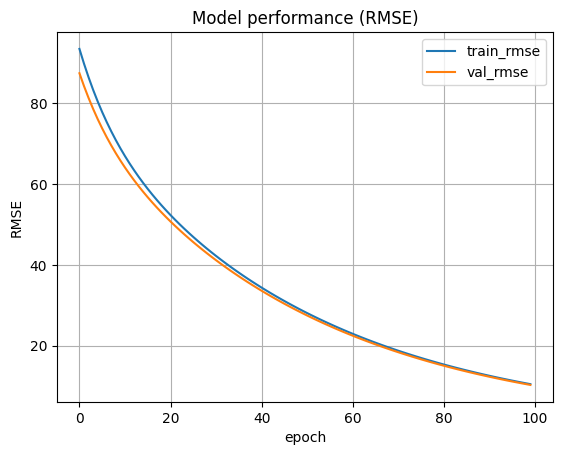

In [86]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'], label='train_rmse')
plt.plot(history.history['val_root_mean_squared_error'], label='val_rmse')

plt.title('Model performance (RMSE)')
plt.xlabel('epoch')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()
